In [1]:
%pip install mesa numpy pandas scipy matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/unicornhappy/.pyenv/versions/3.12.4/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


t= 200 bb/ba/sp= 102.60000000000001 103.0 0.3999999999999915 depth= 27.0 56.0 trades_step= 262
t= 200 bb/ba/sp= 123.7 124.10000000000001 0.4000000000000057 depth= 15.0 3.0 trades_step= 265
t= 200 bb/ba/sp= 98.7 99.7 1.0 depth= 3.0 4.0 trades_step= 447
t= 200 bb/ba/sp= 104.4 104.80000000000001 0.4000000000000057 depth= 23.0 11.0 trades_step= 265
t= 200 bb/ba/sp= None 99.5 None depth= 0.0 2.0 trades_step= 633
t= 200 bb/ba/sp= 88.30000000000001 88.7 0.3999999999999915 depth= 11.0 11.0 trades_step= 264
t= 200 bb/ba/sp= 105.80000000000001 106.30000000000001 0.5 depth= 11.0 31.0 trades_step= 272
t= 200 bb/ba/sp= 106.60000000000001 107.0 0.3999999999999915 depth= 41.0 79.0 trades_step= 252
t= 200 bb/ba/sp= 114.2 114.60000000000001 0.4000000000000057 depth= 22.0 67.0 trades_step= 295
t= 200 bb/ba/sp= 99.9 100.2 0.29999999999999716 depth= 12.0 7.0 trades_step= 281
t= 200 bb/ba/sp= 97.9 99.0 1.0999999999999943 depth= 1.0 2.0 trades_step= 473
t= 200 bb/ba/sp= 104.2 104.60000000000001 0.4000000000

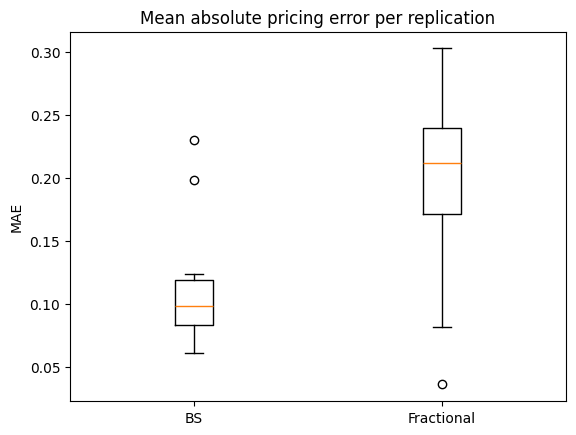

{'option_type': 'put',
 'alpha_frac': 0.5,
 'mean_abs_err_bs': 0.11555810933614348,
 'mean_abs_err_frac': 0.19297432576914578,
 'paired_ttest_t': -1.9179721314682145,
 'paired_ttest_p': 0.08733971754493997,
 'wilcoxon_stat': 11.0,
 'wilcoxon_p': 0.10546875,
 'ks_stat': 0.4,
 'ks_p': 0.0005822568814776493,
 'n_rep': 10,
 'n_paths': 200,
 'n_mc': 40000}

In [1]:
from analysis import run_h1_pricing_experiment
from visualization import plot_error_box
from analysis import run_abm_paths, estimate_sigma
import numpy as np


cfg = dict(
    S0=100.0,
    dt=1/252,
    steps=252,
    n_fund=50,
    n_noise=50,
    n_chart=50,
    fundamental_price=100.0,
    tick_size=0.1,
    impact=0.07,
    omega=1e-6,
    alpha_var=0.05,
    beta_var=0.94,
    fund_strength=0.1,
    chart_strength=0.6,
    chart_vol_sens=2.0,
    mom_window=20,
    vol_window=20,
    agent_noise=0.15,
    p01=0.02,
    p10=0.10,
    shock_rate=0.01,
    shock_impact=8.0,
    n_events_calm=400,
    n_events_stress=1200,
)

dt = cfg["dt"]
steps = cfg["steps"]
r = 0.0

K_grid = [70, 80, 90, 95, 100]

paths = run_abm_paths(cfg, n_paths=50, seed0=1)
print("zero-return share:", (np.diff(paths, axis=1) == 0).mean())
print("min moves per path:", np.min(np.sum(np.diff(paths, axis=1) != 0, axis=1)))


df, by_rep, summary = run_h1_pricing_experiment(
    cfg=cfg,
    dt=dt,
    steps=steps,
    r=r,
    K_grid=K_grid,
    option_type="put",
    alpha_frac=0.5,
    n_paths=200,
    n_mc=40000,
    n_rep=10,
    seed0=1
)

plot_error_box(by_rep)
summary


In [ ]:
alphas = [0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
out = []
for a in alphas:
    _, _, s = run_h1_pricing_experiment(
        cfg=cfg, dt=dt, steps=steps, r=r, K_grid=K_grid,
        option_type="put", alpha_frac=a,
        n_paths=200, n_mc=40000, n_rep=10, seed0=1
    )
    out.append((a, s["mean_abs_err_bs"], s["mean_abs_err_frac"]))
out


100.02 100.06 60
99.92 99.96000000000001 132
100.16 100.2 64
100.06 100.10000000000001 125
100.01 100.05 66
99.89 99.93 142
99.68 99.72 63
99.84 99.88 136
99.62 99.66 68
99.86 99.9 133
99.98 100.02 69
99.93 99.97 136
99.94 99.98 68
100.2 100.24000000000001 135
100.10000000000001 100.14 62
99.96000000000001 100.0 130
100.02 100.06 79
99.98 100.02 142
99.92 99.96000000000001 66
99.68 99.72 130
99.84 99.88 71
99.88 99.92 135
100.12 100.16 58
100.13 100.17 119
100.01 100.05 68
99.99000000000001 100.03 136
100.26 100.3 67
100.4 100.44 137
100.09 100.13 68
100.01 100.05 138
100.06 100.10000000000001 73
100.0 100.04 139
99.84 99.88 69
100.0 100.04 138
99.8 99.84 67
99.94 99.98 136
100.04 100.08 72
100.29 100.33 141
100.06 100.10000000000001 65
100.12 100.16 125
99.7 99.74000000000001 71
99.62 99.66 142
100.22 100.26 63
100.15 100.19 121
99.98 100.02 57
99.94 99.98 122
100.04 100.08 75
99.86 99.9 141
99.79 99.83 67
99.64 99.68 132
100.02 100.06 77
100.23 100.27 141
99.96000000000001 100.0 64
1

[(0.2, 0.0010588898133601587, 0.0037108153662437408),
 (0.3, 0.0010588898133601587, 0.004130963574006331),
 (0.5, 0.0010588898133601587, 0.004153773458893448),
 (0.6, 0.0010588898133601587, 0.003803606208271742),
 (0.7, 0.0010588898133601587, 0.0032338172300603076),
 (0.8, 0.0010588898133601587, 0.00248458158574199),
 (0.9, 0.0010588898133601587, 0.0017385612207339158)]

In [ ]:
from analysis import run_abm_paths, estimate_sigma
paths = run_abm_paths(cfg, n_paths=50, seed0=1)
sigma = estimate_sigma(paths, dt=cfg["dt"])
sigma


100.02 100.06 60
99.92 99.96000000000001 132
100.16 100.2 64
100.06 100.10000000000001 125
100.01 100.05 66
99.89 99.93 142
99.68 99.72 63
99.84 99.88 136
99.62 99.66 68
99.86 99.9 133
99.98 100.02 69
99.93 99.97 136
99.94 99.98 68
100.2 100.24000000000001 135
100.10000000000001 100.14 62
99.96000000000001 100.0 130
100.02 100.06 79
99.98 100.02 142
99.92 99.96000000000001 66
99.68 99.72 130
99.84 99.88 71
99.88 99.92 135
100.12 100.16 58
100.13 100.17 119
100.01 100.05 68
99.99000000000001 100.03 136
100.26 100.3 67
100.4 100.44 137
100.09 100.13 68
100.01 100.05 138
100.06 100.10000000000001 73
100.0 100.04 139
99.84 99.88 69
100.0 100.04 138
99.8 99.84 67
99.94 99.98 136
100.04 100.08 72
100.29 100.33 141
100.06 100.10000000000001 65
100.12 100.16 125
99.7 99.74000000000001 71
99.62 99.66 142
100.22 100.26 63
100.15 100.19 121
99.98 100.02 57
99.94 99.98 122
100.04 100.08 75
99.86 99.9 141
99.79 99.83 67
99.64 99.68 132
100.02 100.06 77
100.23 100.27 141
99.96000000000001 100.0 64
1

0.002581026019142365

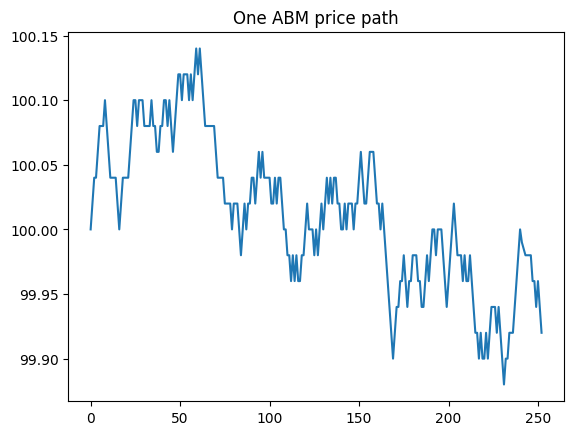

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(paths[0])
plt.title("One ABM price path")
plt.show()


In [ ]:
from visualization import plot_market_dashboard

plot_market_dashboard(cfg, paths[0], dt=cfg["dt"])